In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_datagen = ImageDataGenerator(
    rescale = 1
)
test_datagen = ImageDataGenerator(
    rescale = 1
)

In [ ]:

model = keras.Sequential()

In [ ]:

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:

training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers/train', batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers/test', batch_size=64, target_size=(100,100))


Found 3140 images belonging to 5 classes.
Found 1228 images belonging to 5 classes.


In [ ]:
#Compile and fit the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=1)

Epoch 1/8
50/50 [==============================] - 677s 14s/step - loss: 30.3324 - accuracy: 0.2818 - val_loss: 1.4486 - val_accuracy: 0.3217
Epoch 2/8
50/50 [==============================] - 75s 1s/step - loss: 1.3168 - accuracy: 0.4449 - val_loss: 1.3995 - val_accuracy: 0.3893
Epoch 3/8
50/50 [==============================] - 75s 2s/step - loss: 1.1616 - accuracy: 0.5334 - val_loss: 1.5999 - val_accuracy: 0.2443
Epoch 4/8
50/50 [==============================] - 74s 1s/step - loss: 1.1871 - accuracy: 0.5178 - val_loss: 1.4007 - val_accuracy: 0.4397
Epoch 5/8
50/50 [==============================] - 74s 1s/step - loss: 0.9623 - accuracy: 0.6236 - val_loss: 1.4713 - val_accuracy: 0.4121
Epoch 6/8
50/50 [==============================] - 74s 1s/step - loss: 0.7719 - accuracy: 0.7153 - val_loss: 1.5922 - val_accuracy: 0.4104
Epoch 7/8
50/50 [==============================] - 74s 1s/step - loss: 0.6184 - accuracy: 0.7669 - val_loss: 1.9024 - val_accuracy: 0.4365
Epoch 8/8
50/50 [=======

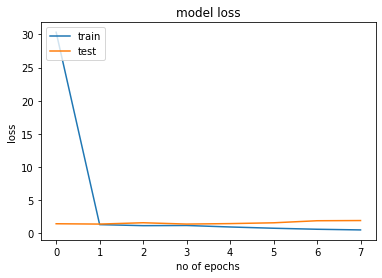

In [ ]:
import matplotlib.pyplot as plt

#plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

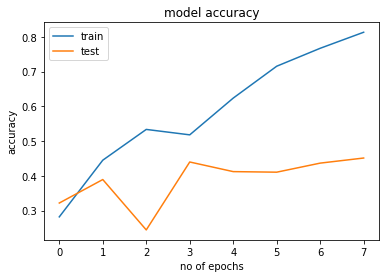

In [ ]:
#plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#save the model
model.save('models/flower_baseline_model.h5')

In [ ]:
#get the class labels from iterator
class_labels = training_iterator.class_indices
print(class_labels)

In [ ]:
# {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# 1-Dropout

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1
)
test_datagen = ImageDataGenerator(
    rescale = 1
)


model = keras.Sequential()


model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
          
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
          
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(5, activation='softmax'))


training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers/train', batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers/test', batch_size=64, target_size=(100,100))



model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=8)


# 2: Padding

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1
)
test_datagen = ImageDataGenerator(
    rescale = 1
)

model = keras.Sequential()




model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3), padding='same'))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(5, activation='softmax'))



training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers/train', batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers/test', batch_size=64, target_size=(100,100))



model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=8)



# 3: Tuning

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt


train_datagen = ImageDataGenerator(
    rescale = 1
)
test_datagen = ImageDataGenerator(
    rescale = 1
)

In [ ]:
def build_model(hp): 
    model = keras.Sequential()
    
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())

    
    model.add(layers.Dense(units=hp.Choice("layer size",[128,256,512]), activation='relu'))
    
    model.add(layers.Dense(5, activation='softmax'))
    
 
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [ ]:

tuner = kt.RandomSearch(build_model, objective="val_accuracy", overwrite=True, max_trials=3, directory="models/param_tuning_demo", project_name="param_tuning_demo")

In [ ]:

tuner.search_space_summary()
tuner.search(training_iterator,validation_data = testing_iterator, epochs=8)
best_model = tuner.get_best_models()[0]

In [ ]:

best_model.save('models/hyper_tuned_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/flowers/hyper_tuned_model.h5')

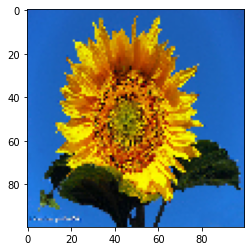

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


img = load_img('/content/drive/MyDrive/flowers/sunflower_sample.jpg', target_size=(100,100))
plt.imshow(img)
plt.show()

In [ ]:

img = img_to_array(img)
img = img.reshape(1,100,100,3)


In [ ]:

result = model.predict(img)

In [ ]:

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:

print(result) 

[[9.6564487e-05 9.0702269e-03 2.1545125e-04 9.8772568e-01 2.8920625e-03]]


In [ ]:

result = np.argmax(result)
print(result)

3


In [ ]:

print([key for key in class_labels][result])


sunflower


# 4: AUGMENTATION

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)
test_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

In [ ]:

model = keras.Sequential()

In [ ]:

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(5, activation='softmax'))

In [ ]:


training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers/train', batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers/test', batch_size=64, target_size=(100,100))


Found 3140 images belonging to 5 classes.
Found 1228 images belonging to 5 classes.


In [ ]:

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=8)

Epoch 1/8
50/50 [==============================] - 87s 2s/step - loss: 1.4008 - accuracy: 0.3863 - val_loss: 1.2556 - val_accuracy: 0.4471
Epoch 2/8
50/50 [==============================] - 85s 2s/step - loss: 1.1568 - accuracy: 0.5223 - val_loss: 1.1290 - val_accuracy: 0.5261
Epoch 3/8
50/50 [==============================] - 85s 2s/step - loss: 1.0793 - accuracy: 0.5659 - val_loss: 0.9877 - val_accuracy: 0.6002
Epoch 4/8
50/50 [==============================] - 85s 2s/step - loss: 0.9715 - accuracy: 0.6232 - val_loss: 0.9582 - val_accuracy: 0.6279
Epoch 5/8
50/50 [==============================] - 84s 2s/step - loss: 0.9270 - accuracy: 0.6344 - val_loss: 0.9374 - val_accuracy: 0.6205
Epoch 6/8
50/50 [==============================] - 84s 2s/step - loss: 0.9006 - accuracy: 0.6522 - val_loss: 0.9282 - val_accuracy: 0.6262
Epoch 7/8
50/50 [==============================] - 84s 2s/step - loss: 0.8879 - accuracy: 0.6490 - val_loss: 0.8510 - val_accuracy: 0.6621
Epoch 8/8
50/50 [==========

# Problem even after applying all the optimzations: 


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [ ]:

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)
test_datagen = ImageDataGenerator(
    rescale = 1/255
)

# Make sure the input shape you mentioned is the same as VGG input image size

In [ ]:

model = VGG16(include_top=False, input_shape=(224,224,3))

In [ ]:

for layer in model.layers:
    layer.trainable = False

In [ ]:

flatten_layer = layers.Flatten()(model.output)


flattened_fc_layer = layers.Dense(512, activation='relu')(flatten_layer)


flattened_fc_softmax_layer = layers.Dense(5, activation='softmax')(flattened_fc_layer)


In [ ]:

model = Model(inputs=model.inputs, outputs=flattened_fc_softmax_layer)

In [ ]:

training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers/train', batch_size=64, target_size=(224,224))
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers/test', batch_size=64, target_size=(224,224))


In [ ]:

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=4)

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:

model.save('/content/drive/MyDrive/flowers/transfer_vgg16_flower.h5')

# predict 

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

model = load_model('/content/drive/MyDrive/flowers/transfer_vgg16_flower.h5')

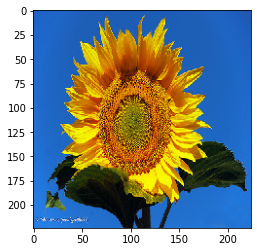

In [ ]:
img = load_img('/content/drive/MyDrive/flowers/sunflower_sample.jpg', target_size=(224,224))
plt.imshow(img)
plt.show()

In [ ]:

img = img_to_array(img)
img = img.reshape(1,224,224,3)

In [ ]:

result = model.predict(img)

In [ ]:

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:

print(result)


[[5.9110647e-28 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]]


In [ ]:

result = np.argmax(result)
print(result)

3


In [ ]:

print([key for key in class_labels][result])

sunflower


# Questions:



# Question 1: Perform Transfer Learning with Resnet

# Question 2: Do Training for Non-Dense layers while using Transfer learning

# Question 3: Change the flowers dataset by doing edge detection and then apply all the non-transfer learning and transfer models

# Question 4: Look at the Weights Repository- TensorFlowHub and Implement new models on 102 Oxford Flowers Dataset

Link: https://www.robots.ox.ac.uk/~vgg/data/flowers/102/



In [ ]:
#There are 4 questions, you can solve any 3 of them.